In [1]:
# imported necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('C:/Users/sande/OneDrive/Desktop/shacklabs project/DS - Assignment Part 1 data set.xlsx') #importing excel file

In [3]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
df.isnull().sum() #checking null values

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [5]:
df.shape   # size of data 

(414, 9)

In [6]:
df.duplicated().sum()  #checking duplicate values

0

In [7]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [8]:
# converting House Age (years) to (months)
import math
def func1(col):
    second,first=math.modf(col)
    return ((first*12)+(second*10))

In [9]:
df['House Age Month']=df['House Age'].apply(func1)

In [10]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,House Age Month
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,384.0
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,233.0
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,159.0
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,159.0
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,60.0


In [11]:
# dropping House Age and Transaction date columns as not giving much info
df.drop(['Transaction date','House Age'],axis=1,inplace=True)

In [12]:
df.head()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,House Age Month
0,84.87882,10,24.98298,121.54024,1,575,37.9,384.0
1,306.59470,9,24.98034,121.53951,2,1240,42.2,233.0
2,561.98450,5,24.98746,121.54391,3,1060,47.3,159.0
3,561.98450,5,24.98746,121.54391,2,875,54.8,159.0
4,390.56840,5,24.97937,121.54245,1,491,43.1,60.0


In [13]:
df.shape

(414, 8)

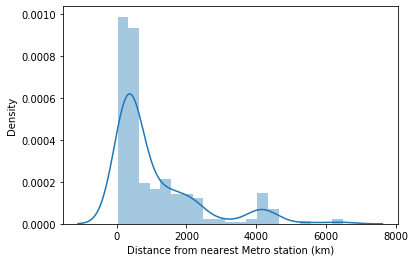

In [14]:
sns.distplot(df['Distance from nearest Metro station (km)'])
plt.show()

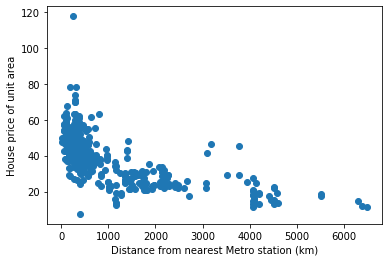

In [15]:
plt.scatter(df['Distance from nearest Metro station (km)'],df['House price of unit area'])
plt.xlabel('Distance from nearest Metro station (km)')
plt.ylabel('House price of unit area')
plt.show()

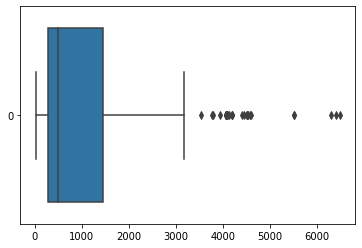

In [16]:
sns.boxplot(df['Distance from nearest Metro station (km)'],orient='h') # we can see here the outliers
plt.show()

In [17]:
# using emperical formula for finding range for detecting outlier
l=df['Distance from nearest Metro station (km)'].mean()-(3*(df['Distance from nearest Metro station (km)'].std()))
u=df['Distance from nearest Metro station (km)'].mean()+(3*(df['Distance from nearest Metro station (km)'].std()))

In [18]:
l,u

(-2702.443097310511, 4870.214475136598)

In [19]:
df[df['Distance from nearest Metro station (km)']>u]

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,House Age Month
8,5512.038,1,24.95095,121.48458,1,588,18.8,379.0
116,6396.283,1,24.94375,121.47883,1,495,12.2,369.0
249,6306.153,1,24.95743,121.47516,2,1439,15.0,216.0
255,5512.038,1,24.95095,121.48458,2,1368,17.4,377.0
347,6488.021,1,24.95719,121.47353,3,933,11.2,208.0


In [20]:
outlier=np.where(df['Distance from nearest Metro station (km)']>u)[0]

In [21]:
outlier

array([  8, 116, 249, 255, 347], dtype=int64)

In [22]:
df.drop(outlier,inplace=True) # dropping outliers

In [23]:
df.shape # new shape of data

(409, 8)

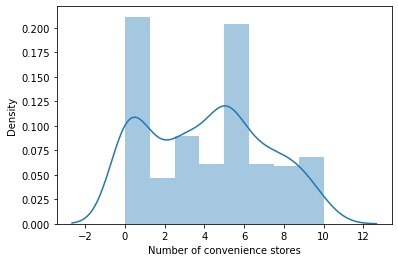

In [25]:
sns.distplot(df['Number of convenience stores'])
plt.show()

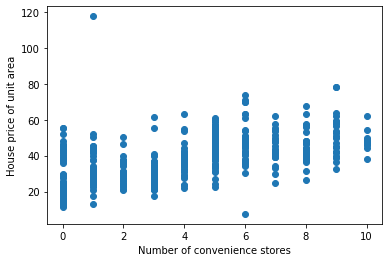

In [26]:
plt.scatter(df['Number of convenience stores'],df['House price of unit area'])
plt.xlabel('Number of convenience stores')
plt.ylabel('House price of unit area')
plt.show()

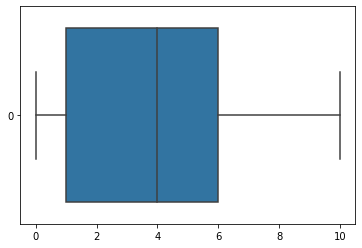

In [27]:
sns.boxplot(df['Number of convenience stores'],orient='h') # no outliers detected
plt.show()

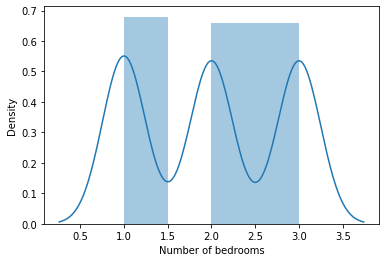

In [28]:
sns.distplot(df['Number of bedrooms'])
plt.show()

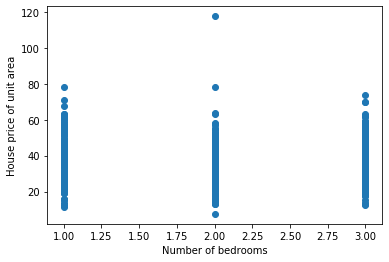

In [29]:
plt.scatter(df['Number of bedrooms'],df['House price of unit area'])
plt.xlabel('Number of bedrooms')
plt.ylabel('House price of unit area')
plt.show()

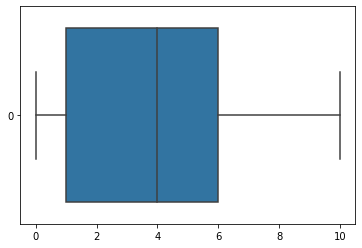

In [30]:
sns.boxplot(df['Number of convenience stores'],orient='h')   # outlier not detected
plt.show()

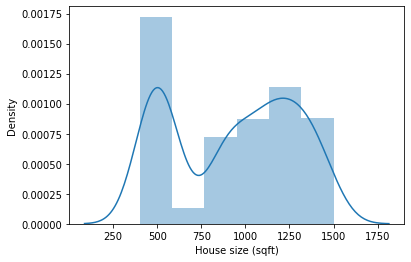

In [31]:
sns.distplot(df['House size (sqft)'])
plt.show()

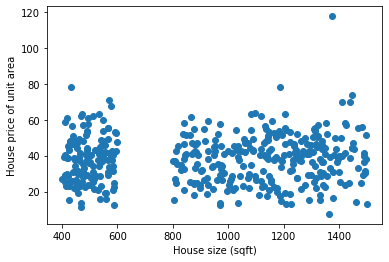

In [32]:
plt.scatter(df['House size (sqft)'],df['House price of unit area'])
plt.xlabel('House size (sqft)')
plt.ylabel('House price of unit area')
plt.show()

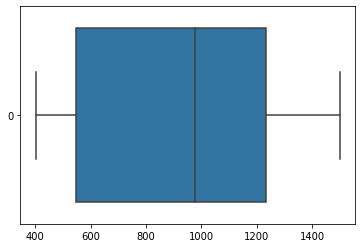

In [33]:
sns.boxplot(df['House size (sqft)'],orient='h') # no outliers detected
plt.show()

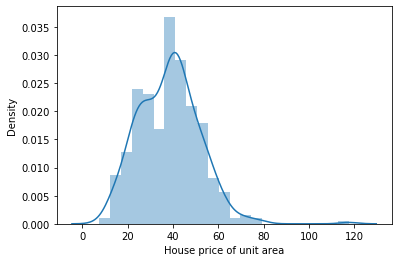

In [34]:
sns.distplot(df['House price of unit area'])
plt.show()

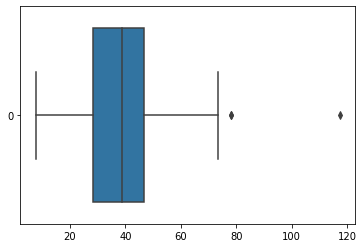

In [35]:
sns.boxplot(df['House price of unit area'],orient='h') # outlier detected
plt.show()

In [36]:
# using emperical formula for detecting Outliers
v=df['House price of unit area'].mean()+(3*df['House price of unit area'].std())
v

78.59004948155227

In [37]:
new_out=df[df['House price of unit area']>v].index[0]
new_out

270

In [38]:
df.drop(new_out,inplace=True)

In [39]:
df.shape

(408, 8)

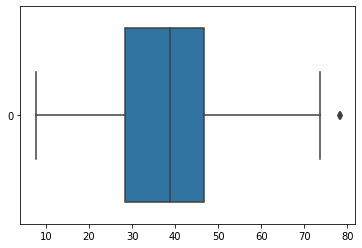

In [40]:
sns.boxplot(df['House price of unit area'],orient='h')
plt.show()

In [41]:
df.describe()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,House Age Month
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,1025.150882,4.139706,24.969224,121.534030,1.990196,929.987745,38.067892,210.713235
std,1143.147795,2.942962,0.012342,0.014227,0.820440,348.127596,12.871843,136.805853
min,23.382840,0.000000,24.932070,121.495070,1.000000,402.000000,7.600000,0.000000
25%,289.324800,1.000000,24.963050,121.529805,1.000000,548.000000,28.325000,105.000000
50%,492.231300,4.000000,24.971305,121.538795,2.000000,975.000000,38.700000,192.500000
75%,1420.772500,6.000000,24.977998,121.543480,3.000000,1231.000000,46.600000,331.500000
max,4605.749000,10.000000,25.014590,121.566270,3.000000,1500.000000,78.300000,524.000000


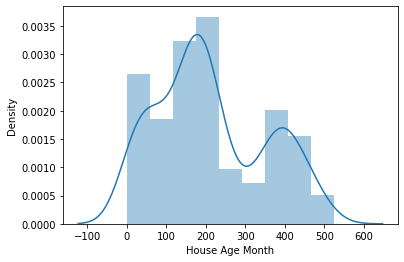

In [42]:
sns.distplot(df['House Age Month'])
plt.show()

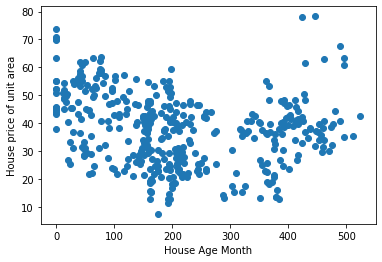

In [43]:
plt.scatter(df['House Age Month'],df['House price of unit area'])
plt.xlabel('House Age Month')
plt.ylabel('House price of unit area')
plt.show()

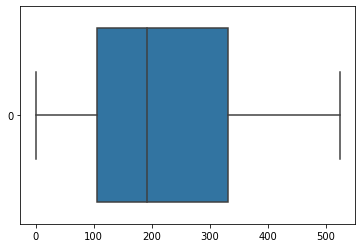

In [44]:
sns.boxplot(df['House Age Month'],orient='h') # no outlier detected
plt.show()

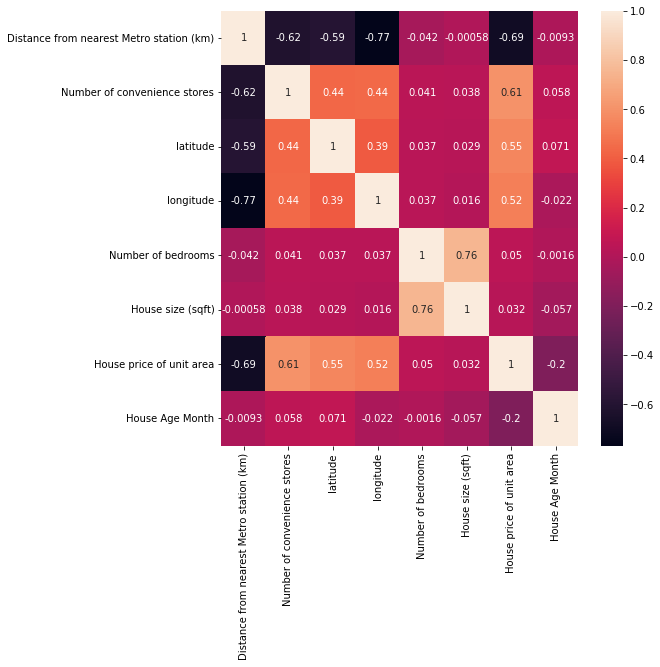

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

As we can see from above heatmap we can see the multicolinearity between feature Number of bedrooms and House size (sqft) are highly correlated 

In [46]:
df.columns

Index(['Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area',
       'House Age Month'],
      dtype='object')

In [47]:
df.drop('House size (sqft)',axis=1,inplace=True) # droping feature

In [48]:
df.head()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House price of unit area,House Age Month
0,84.87882,10,24.98298,121.54024,1,37.9,384.0
1,306.59470,9,24.98034,121.53951,2,42.2,233.0
2,561.98450,5,24.98746,121.54391,3,47.3,159.0
3,561.98450,5,24.98746,121.54391,2,54.8,159.0
4,390.56840,5,24.97937,121.54245,1,43.1,60.0


In [49]:
df.shape

(408, 7)

In [50]:
# splitting the data into dependent amd independent feature 
x=df.drop('House price of unit area',axis=1)
y=df.iloc[:,-2]

In [51]:
x.head()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House Age Month
0,84.87882,10,24.98298,121.54024,1,384.0
1,306.59470,9,24.98034,121.53951,2,233.0
2,561.98450,5,24.98746,121.54391,3,159.0
3,561.98450,5,24.98746,121.54391,2,159.0
4,390.56840,5,24.97937,121.54245,1,60.0


In [52]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House price of unit area, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split # for training and testing 

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
from sklearn.metrics import mean_absolute_error,r2_score

In [56]:
# deciding random state value
scores=[]
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_test)
    value=r2_score(y_test,ypred)
    scores.append(value)
print(max(scores))

0.7840866636395083


In [57]:
np.argmax(scores) # at random state =55 will get maximum accuracy

55

In [58]:
scores.index(max(scores))

55

In [59]:
# splitting data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=55)

In [60]:
x_train.shape

(326, 6)

In [61]:
y_train.shape

(326,)

In [62]:
# scaling down values 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [63]:
#linear regression model
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
ypred=lr.predict(x_test_scaled)
print('R2 Score',r2_score(y_test,ypred))
print('MAE',mean_absolute_error(y_test,ypred))

R2 Score 0.6031147623594095
MAE 6.796610543481783


In [64]:
# Ridge model
from sklearn.linear_model import Ridge
ri=Ridge()
ri.fit(x_train_scaled,y_train)
ypred=ri.predict(x_test_scaled)
print('R2 Score',r2_score(y_test,ypred))
print('MAE',mean_absolute_error(y_test,ypred))

R2 Score 0.6029010575010234
MAE 6.797723287168421


In [65]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train_scaled,y_train)
ypred=dt.predict(x_test_scaled)
print('R2 Score',r2_score(y_test,ypred))
print('MAE',mean_absolute_error(y_test,ypred))

R2 Score 0.6517806396079662
MAE 6.045121951219512


In [69]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train_scaled,y_train)
ypred=rf.predict(x_test_scaled)
print('R2 Score',r2_score(y_test,ypred))
print('MAE',mean_absolute_error(y_test,ypred))

R2 Score 0.7758202533922516
MAE 5.03793832752613


In [70]:
# K nearst neighbors
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train_scaled,y_train)
ypred=kn.predict(x_test_scaled)
print('R2 Score',r2_score(y_test,ypred))
print('MAE',mean_absolute_error(y_test,ypred))

R2 Score 0.7041597672980076
MAE 5.975121951219512


In [71]:
# Support Vector Regressor
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train_scaled,y_train)
ypred=sv.predict(x_test_scaled)
print('R2 Score',r2_score(y_test,ypred))
print('MAE',mean_absolute_error(y_test,ypred))

R2 Score 0.5943458580518103
MAE 6.867747856206874


In [72]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
ex=ExtraTreesRegressor()
ex.fit(x_train_scaled,y_train)
ypred=ex.predict(x_test_scaled)
print('R2 Score',r2_score(y_test,ypred))
print('MAE',mean_absolute_error(y_test,ypred))

R2 Score 0.764756454676976
MAE 5.04585975609756


After checking all models acurracy Random Forest gives the higest accuracy of 78% so to increase the accuracy now we can apply hyperparameter tunning

In [73]:
# Hyperparameter Tuning 
from sklearn.model_selection import RandomizedSearchCV

In [74]:
# initiallizing the parameters
param_distributions={
     'n_estimators':[i for i in range(1,150)],
     'max_depth':[2,8,14,20,28,35,43,50,None],
     'max_features':[0.4,0.6,0.8,1.0],
     'random_state':[i for i in range(1,50)]
 }

In [75]:
cv=RandomizedSearchCV(rf,param_distributions=param_distributions)
cv.fit(x_train_scaled,y_train)           # adding parameters

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [76]:
cv.best_params_   # getting the best parameter for random forest model

{'random_state': 31, 'n_estimators': 143, 'max_features': 0.6, 'max_depth': 35}

In [79]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=143,max_depth=35,max_features=0.6,random_state=31)  # applying the best parameter to increase in accuracy
rf.fit(x_train_scaled,y_train)
ypred=rf.predict(x_test_scaled)
print('R2 Score',r2_score(y_test,ypred))
print('MAE',mean_absolute_error(y_test,ypred))

R2 Score 0.7909702944499654
MAE 4.765293588525292


After applying hyperparameter tunning got increase in accuracy i.e approx 80%

In [80]:
ypred  # predicted values

array([38.59300699, 30.29160839, 39.18335664, 39.56447552, 41.16755245,
       41.46699301, 30.19734266, 38.53776224, 39.70104895, 44.61748252,
       30.63417249, 42.68041958, 49.62587413, 39.96490676, 44.95244755,
       23.32167832, 19.13426573, 42.63846154, 51.48706294, 25.16293706,
       25.59762238, 49.35034965, 50.57972028, 44.4951049 , 58.41188811,
       32.76643357, 36.1041958 , 68.11538462, 44.71468531, 48.57342657,
       27.71958042, 44.8006993 , 27.25034965, 41.0979021 , 15.76923077,
       48.7210373 , 47.07972028, 52.6972028 , 19.77482517, 33.89174825,
       70.40870629, 30.44475524, 19.26503497, 30.0986014 , 26.04265734,
       28.13216783, 51.50979021, 41.76447552, 40.37622378, 54.8872028 ,
       25.71678322, 55.66713287, 50.57972028, 16.82447552, 27.88741259,
       68.17727273, 46.05454545, 38.49300699, 51.72797203, 23.91048951,
       57.52797203, 52.98741259, 40.0986014 , 24.01748252, 52.21748252,
       40.67555278, 47.2993007 , 57.88881119, 39.43006993, 47.90

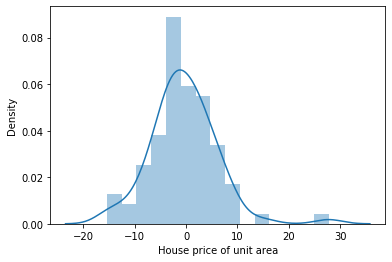

In [82]:
sns.distplot(y_test-ypred)  # model looks good
plt.show()

In [83]:
rf.predict([[84.87882,10,24.98298,121.54024,1,384.0]])   

array([33.9048951])

In [84]:
import pickle

In [85]:
pickle.dump(rf,open('House_price.pkl','wb'))

In [86]:
pickle.dump(df,open('df.pkl','wb'))